# Decision Tree

Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # turn our categorical data into integers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Getting the Dataset and Cleaning it

We can get the dataset at Kaggle https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [5]:
# load dataset
df = pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.columns

col_names = ["ID", "dependents", "education", "self-employed", "income_annum", "loan_amount", 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

df.columns = col_names
df.head()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Label Encoder

Label encoder will change the categorical data to numerical data [education, self-employed, loan_status]

In [7]:
categorical_data = ["education", "self-employed", "loan_status"]

label_encoder = LabelEncoder()

for i in categorical_data:
  df[i] = label_encoder.fit_transform(df[i])

df.head()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


# Clean Data

In [8]:
clean_data = df.drop(["ID"], axis=1)

# Split into independent variable

In [9]:
X = clean_data.iloc[:, :-1].values #All columns except 'loan_status'
y = clean_data.iloc[:, -1].values #Only 'loan_status

# Splitting the data

For performance evaluation, divide the data into training set and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build the model

In [11]:
model = DecisionTreeClassifier()
log_model = LogisticRegression(max_iter=1000)

#Train both models

model.fit(X_train, y_train)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Creating the predictions

In [13]:
#Predictions from the decision tree
y_pred = model.predict(X_test)

#Predictions from the logistical regression
Y_pred_log = log_model.predict(X_test)



Dataframe Actual VS Predicted

In [14]:
table = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
table

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
849,0,0
850,0,0
851,0,0
852,0,0


# Model Evaluation

## Confusion Matrix

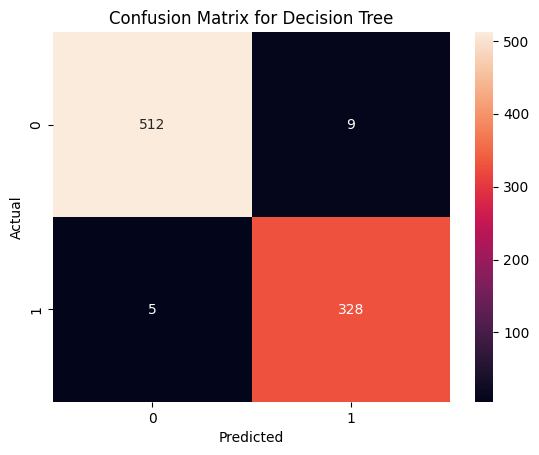

In [15]:
'''
TN = True Negative (correctly predicted “not approved”)

TP = True Positive (correctly predicted “approved”)

FP = False Positive (predicted “approved” when it was “not approved”)

FN = False Negative (predicted “not approved” when it was “approved”)
'''

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d') # fmt make it render numbers as integers instead of float
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Logistical Regression

We're just comparing how well a linear regression model will be against a non linear regression model.

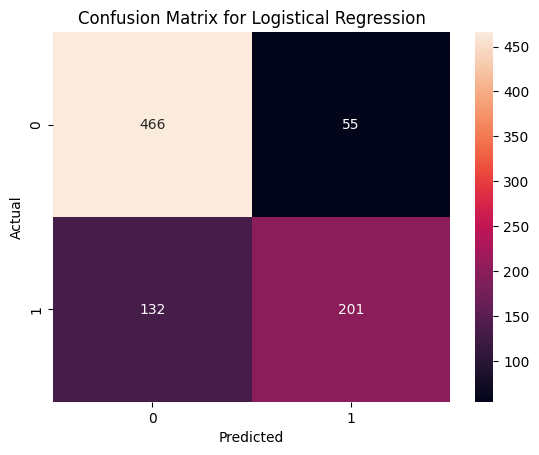

In [16]:
cm = confusion_matrix(y_test, Y_pred_log)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Logistical Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classication Report

In [17]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       521
           1       0.97      0.98      0.98       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [18]:
# classification report for Logistical Regression (Comparison only)
report = classification_report(y_test, Y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       521
           1       0.79      0.60      0.68       333

    accuracy                           0.78       854
   macro avg       0.78      0.75      0.76       854
weighted avg       0.78      0.78      0.77       854



# AUC - ROC

Area under the curve of receiving operating characteristics

In [19]:
#instead of predicting the class, we now predict the probabilities
y_pred_probab = model.predict_proba(X_test)

#compare for false and true positives
fpr, tpr, treshholds = roc_curve(y_test, y_pred_probab[:, 1])

## AUC-ROC Decision Tree

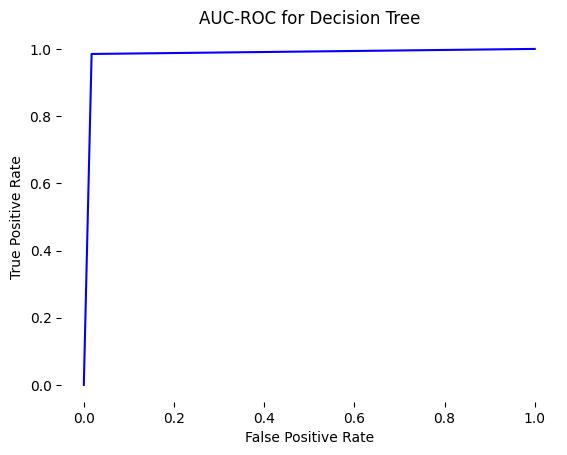

In [20]:
plt.plot(fpr, tpr, label="Decision Tree", color="blue")
plt.title('AUC-ROC for Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.box(False)
plt.show()

# AUC - ROC for Logistical Regression

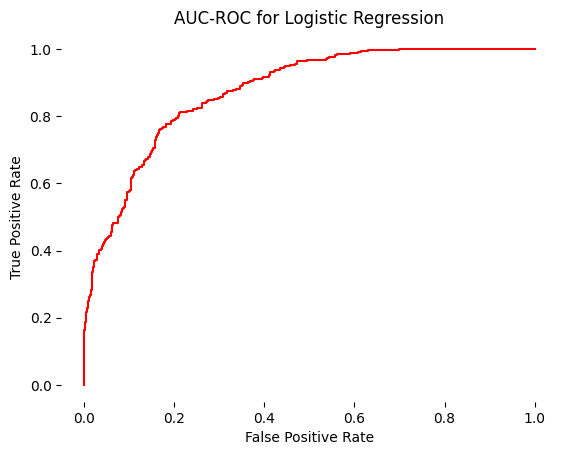

In [21]:
y_pred_log_prob = log_model.predict_proba(X_test)

fpr, tpr, treshholds = roc_curve(y_test, y_pred_log_prob[:, 1])

plt.plot(fpr, tpr, label="Logistical Regression", color="red")
plt.title('AUC-ROC for Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.box(False)
plt.show()

# AUC Score

In [22]:
#AUC Score for Decision Tree
auc_score = roc_auc_score(y_test, y_pred_probab[:, 1])
print(auc_score * 100)

98.38552564080395


In [23]:
# Accuracy for Decision Tree

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

98.36065573770492


# Visualizing the Decision Tree

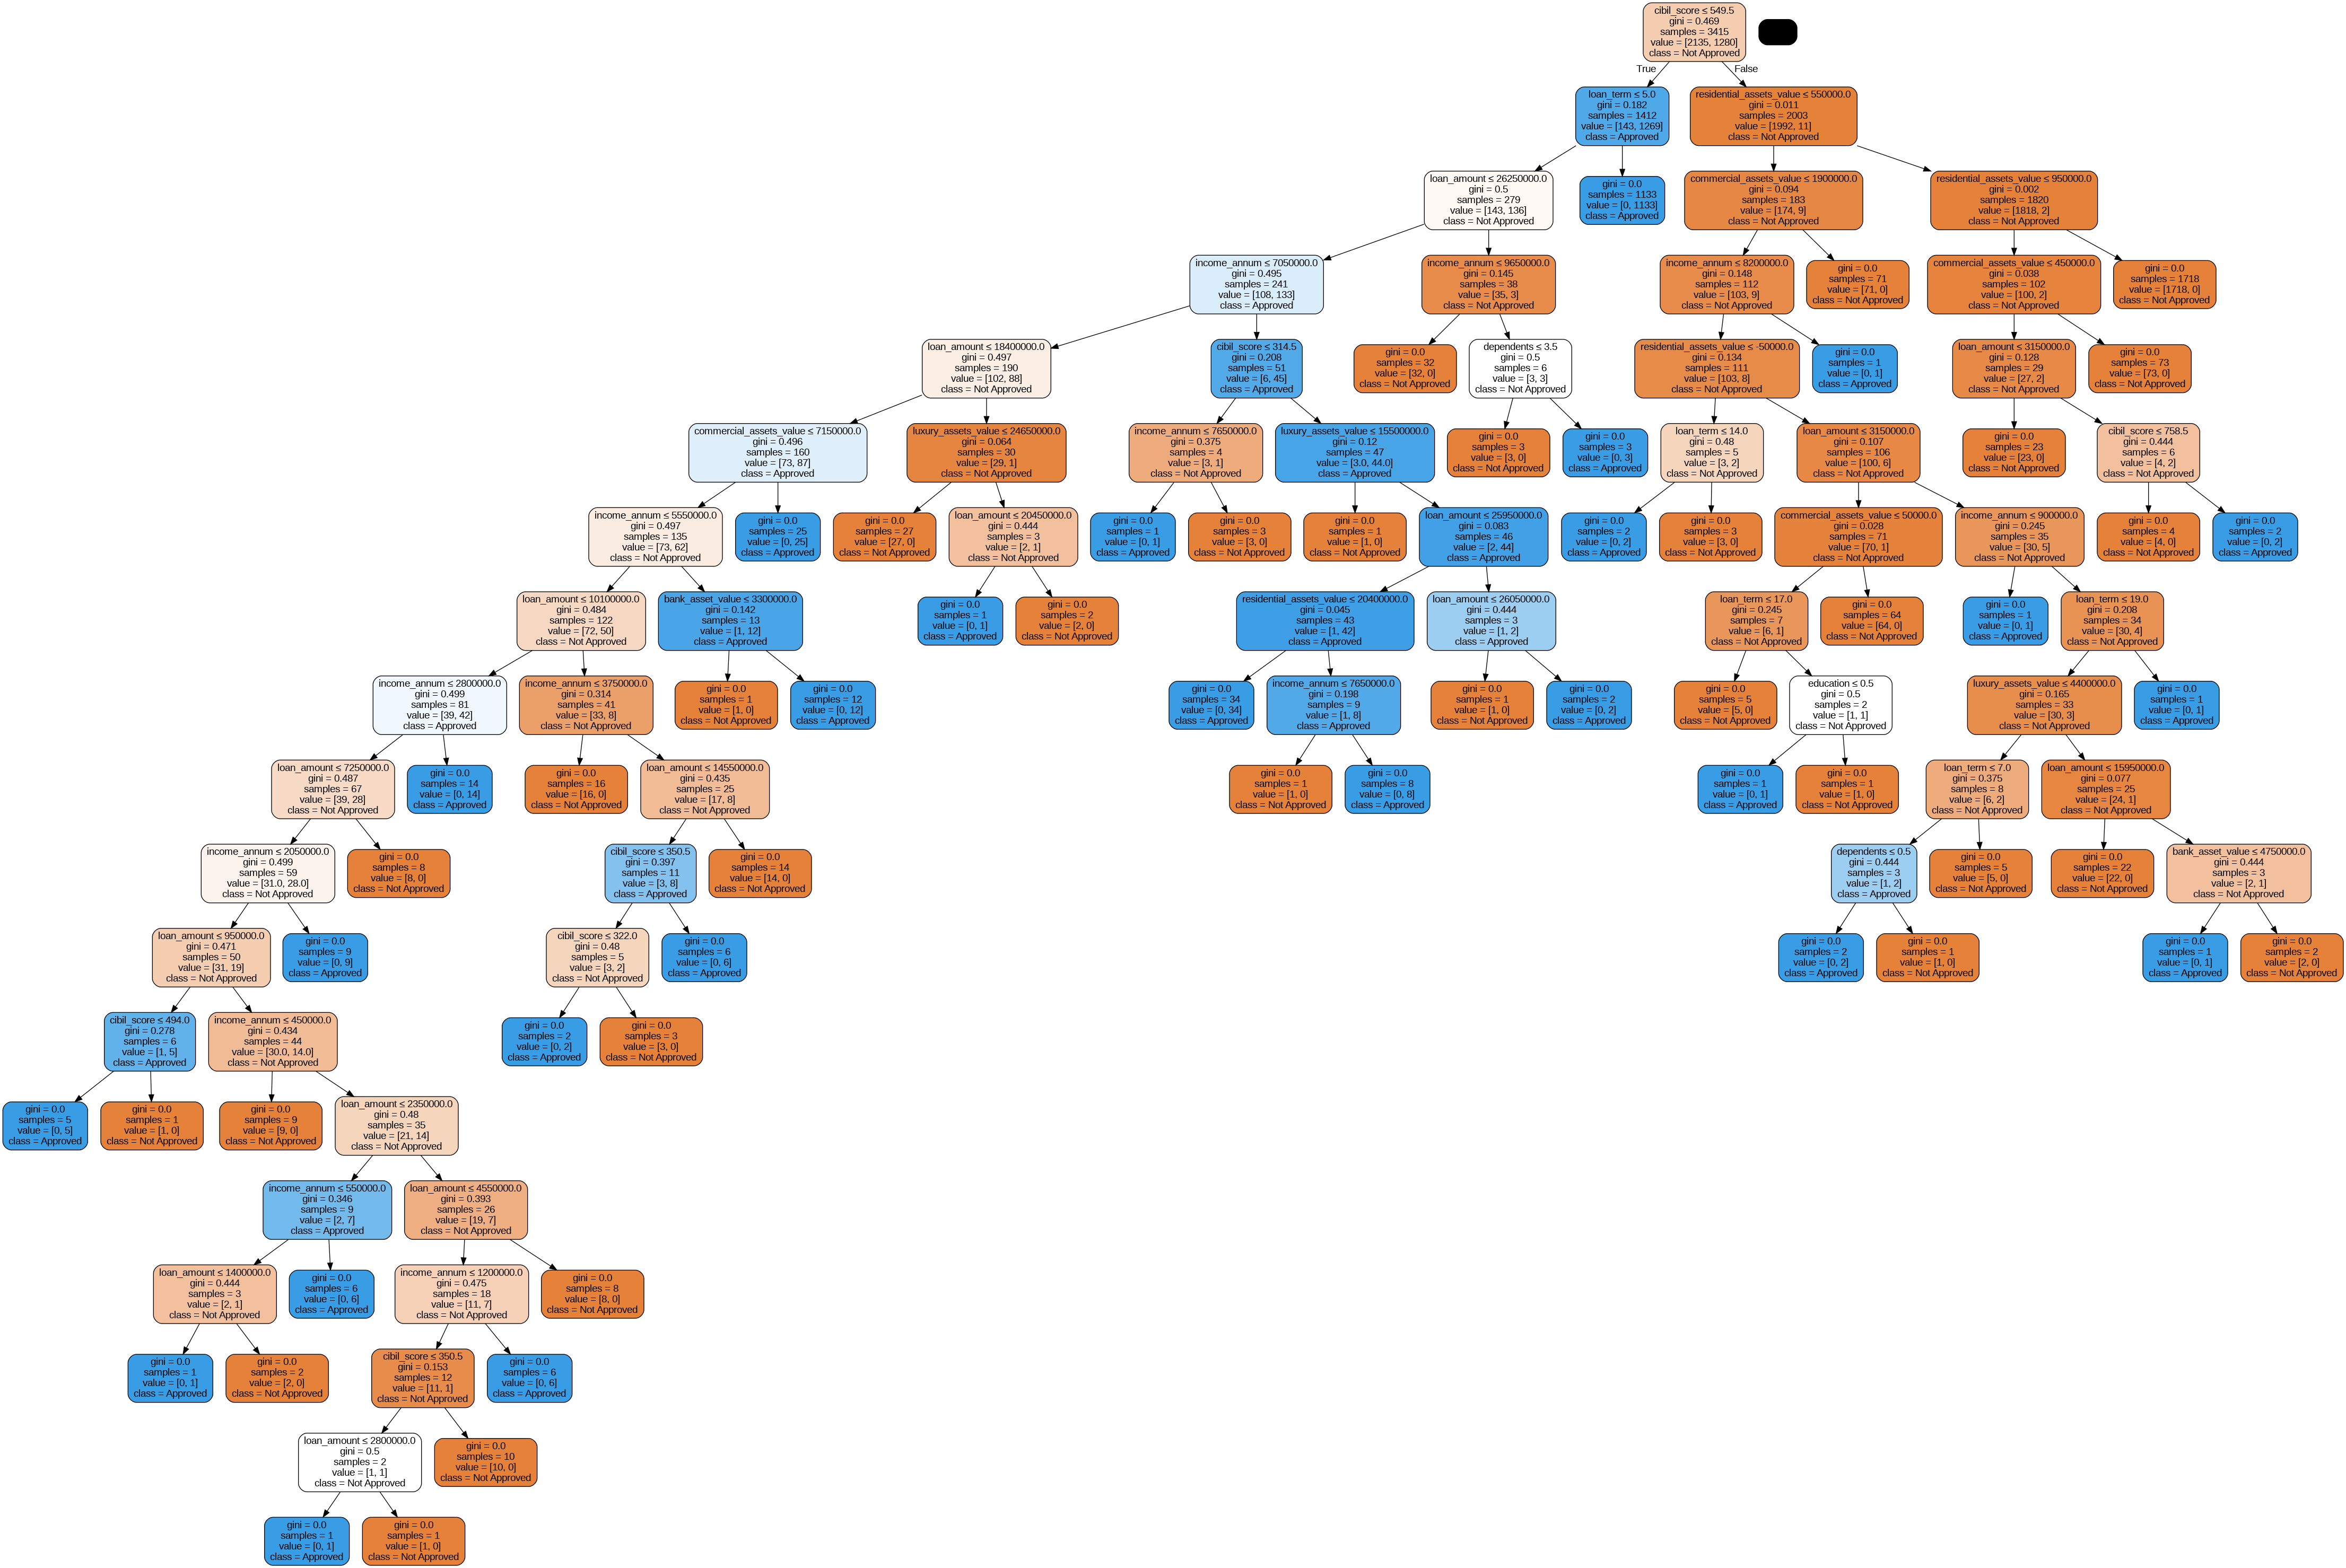

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(
    model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=clean_data.columns[:-1],
    class_names=["Not Approved", "Approved"]
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loan_decision_tree.png')
Image(graph.create_png())



# Calculating the loan prediction with our own data

In [25]:
clean_data.head()

,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [27]:
data_for_approval = [
    5,       # no_of_dependents: 5 dependents
    1,       # education: 1 (Likely 'Not Graduate' after LabelEncoding)
    1,       # self_employed: 1 (Likely 'Yes' after LabelEncoding)
    200000,  # income_annum: 200,000 (Annual income)
    10000,   # loan_amount: 10,000 (Loan amount requested - very low)
    12,      # loan_term: 12 years
    770,     # cibil_score: 770 (A good CIBIL score)
    150000,  # residential_assets_value: 150,000
    0,       # commercial_assets_value: 0
    0,       # luxury_assets_value: 0
    139999   # bank_asset_value: 139,999
]
data_for_rejection = [
    5,        # no_of_dependents: 5 dependents
    1,        # education: 1 (Likely 'Not Graduate' after LabelEncoding)
    1,        # self_employed: 1 (Likely 'Yes' after LabelEncoding)
    500000,   # income_annum: 500,000 (Annual income)
    15000000, # loan_amount: 15,000,000 (Loan amount requested - very high relative to income)
    10,       # loan_term: 10 years
    350,      # cibil_score: 350 (A very low CIBIL score, strong indicator for rejection)
    100000,   # residential_assets_value: 100,000
    0,        # commercial_assets_value: 0
    50000,    # luxury_assets_value: 50,000
    200000    # bank_asset_value: 200,000
]

data = np.array(data_for_rejection).reshape(1, -1)

loan_status = model.predict(data)

#the model predicts that the person with this data will be eligible for loan
if loan_status[0] == 0:
    print("✅ This applicant is predicted to be *eligible* for a loan.")
else:
    print("❌ This applicant is predicted *not* to be eligible for a loan.")

❌ This applicant is predicted *not* to be eligible for a loan.
